# Домашнее задание 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Numpy

### Создайте двумерный массив 5x5 с 1 на границе и 0 внутри.

In [ ]:
def border():
    a = np.ones((5, 5), dtype=int)
    for i in range(1, 4):
      for j in range(1, 4):
        a[i, j] = 0
    return a

### Создайте матрицу 8x8 и заполните ее шахматным узором.

In [ ]:
def checkerboard():
    a = np.identity(2, dtype=int)
    a = np.tile(a, (4, 4))

    return a

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

### Вычтите из каждой строки матрицы среднее этой строки

In [ ]:
def sub():
    a = np.array([
        [1, 2, 3],
        [3, 4, 5],
        [6, 7, 8]
    ])
    b = a.sum(axis=1) / a.shape[1]
    b = np.array(b, dtype=int)
    b = np.tile(b, (3, 1)).T
    a = a - b
    return a

(array([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]]),
 array([[2, 2, 2],
        [4, 4, 4],
        [7, 7, 7]]))

### Как отсортировать матрицу по последней строке?

In [ ]:
def sort():
    a = np.array([
        [1, 2, 3],
        [3, 4, 5],
        [6, 7, 8]
    ])
    a = a.T
    size = a.shape[0]
    for i in range(size):
      for j in range(i+1, size):
        if a[i, -1] > a[j, -1]:
          b = np.array(a[i])
          a[i] = a[j]
          a[j] = b
    a = a.T
    return a

## Pandas

In [6]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

### Выберите данные в 3, 4, 5 строчке колонок `animal` и `age`

In [ ]:
def animal_age(df):
    df = df[['animal', 'age']].iloc[2:5]
    return df

,animal,age
c,snake,0.5
d,dog,NaN
e,dog,5.0


### Выберите строки, где животное является котом и возраст меньше 3

In [ ]:
def cats(df):
    df = df[(df['animal'] == 'cat') & (df['age'] < 3)]
    return df

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


### Для каждого типа животного и количества посещений найдите средний возраст. Другими словами, каждая строка - это животное, каждый столбец - количество посещений, а значения - средний возраст

In [ ]:
def mean_table(df):
    df = df.pivot_table(values='age', index='animal', columns='visits', aggfunc='mean')
    return df

visits,1,2,3
animal,,,
cat,2.5,NaN,2.5
dog,3.0,6.0,NaN
snake,4.5,0.5,NaN


### DataFrame имеет столбец групп 'grps' и столбец целочисленных значений 'vals'. Для каждой группы найдите сумму трех наибольших значений.

In [ ]:
def threesome():
    data = {
        "grps": ["a", "a", "a", "a", "b", "b", "b", "b"],
        "vals": [100, 200, 109, 50, 23, 100, 33, 67],
    }
    df = pd.DataFrame(data)
    df = df.groupby('grps')['vals'].sum() - df.groupby('grps')['vals'].min()
    return df

,vals
grps,
a,409
b,200


## Matplotlib

Тут сложно написать тесты, так что надеюсь на вашу честность. Поставьте `True`, если вы сделали задание

### Нарисуйте пару смешных графиков для `df` (который с животными)
Это не дз по датавизу, если хотите - можем сделать такую пару

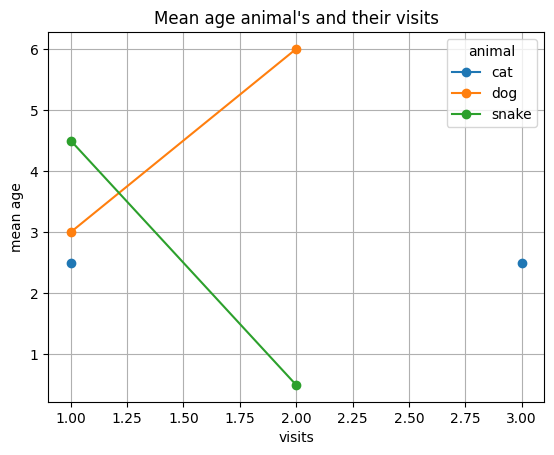

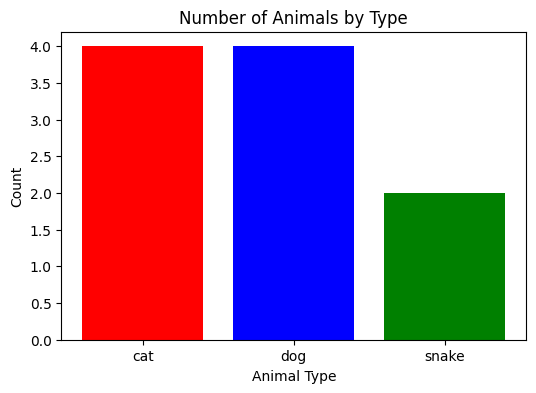

True

In [7]:
def plots():
    pivot = df.pivot_table(values='age', index='animal', columns='visits', aggfunc='mean')
    pivot.T.plot(kind='line', marker='o')

    plt.title("Mean age animal's and their visits")
    plt.xlabel("visits")
    plt.ylabel("mean age")
    plt.legend(title="animal")
    plt.grid(True)

    plt.show()


    animal_counts = df['animal'].value_counts()
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(animal_counts.index, animal_counts.values, color=['red', 'blue', 'green'])

    ax.set_title("Number of Animals by Type")
    ax.set_xlabel("Animal Type")
    ax.set_ylabel("Count")

    plt.show()

    return True